**Group 12 Project Proposal**

# Predicting Occupation Using KNN Classification

## Introduction

A person's occupation has a significant impact on their lifestyle and health. Overall well-being can be influenced by a number of work-related factors, including physical demands, irregular hours, sedentary positions, and stress related to one's job. Maintaining a healthy balance between work obligations and personal well-being is essential for a long-lasting and satisfying career. The following suggestion is based on this awareness:

Our work is founded on the concept that different occupational categories may show certain patterns in health and wellness parameters, allowing one to infer a person's career from variables like stress and sleep habits.

Our research aims to determine whether it is possible to predict an individual's occupation using predictor variables from the dataset of interest. 


The Sleep Health and Lifestyle Dataset includes data on gender, age, occupation, sleep metrics, physical activity, stress levels, BMI, cardiovascular health, and sleep disorders. The dataset's columns consist of Person ID, Gender, Age, Occupation, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, BMI Category, Blood Pressure, Heart Rate, Daily Steps, and Sleep Disorder Status (None, Insomnia, Sleep Apnea). This dataset facilitates in-depth analysis of sleep patterns, lifestyle factors, cardiovascular health, and sleep disorders for a diverse population.
The Hypothesis underlying our study is that distinct occupational categories may exhibit specific patterns in health and wellness factors, making it possible to infer a person's profession based on factors such as sleep and stress levels. 


In [39]:
library(tidyverse)
library(repr)
library(tidymodels)
url  <- "https://raw.githubusercontent.com/hmza-exe/DSCI-100-GroupProject_003-12/main/Sleep_health_and_lifestyle_dataset.csv"
sleep_health_data <- read_csv(url) |> rename("person_id" = "Person ID", "gender" = "Gender", "age" = "Age", "occupation" = "Occupation", "sleep_duration" = "Sleep Duration", "quality_of_sleep" = "Quality of Sleep", "physical_activity_level" = "Physical Activity Level", "stress_level" = "Stress Level", "bmi_category" = "BMI Category", "blood_pressure" = "Blood Pressure", "heart_rate" = "Heart Rate", "daily_steps" = "Daily Steps", "sleep_disorder" = "Sleep Disorder")

Rows: 374 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Gender, Occupation, BMI Category, Blood Pressure, Sleep Disorder
dbl (8): Person ID, Age, Sleep Duration, Quality of Sleep, Physical Activity...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Methods

We will examine the Sleep Health and Lifestyle Dataset using the K-nearest neighbours (KNN) classification technique. The length of sleep, quality of sleep, degree of physical activity, and stress level are important predictors. When evaluating their combined impact on stress levels and general health, these elements are relevant. We will use a scatterplot to plot stress levels against particular variables in order to visualise the results. The KNN model's predictions can be more easily interpreted and useful information for occupational health interventions can be obtained with the help of this graphical representation, which will provide a clear picture of linkages and trends.

## Exploratory Data Analysis

To determine which predictors to use in our analysis we plot various predictor variables against Occupation (classifier) in order to compare the strengths of their correlations. 


Warning message:
“There were 44 warnings in `summarize()`.
The first warning was:
ℹ In argument: `across(everything(), mean, na.rm = TRUE)`.
ℹ In group 1: `occupation = "Accountant"`.
Caused by warning in `mean.default()`:
! argument is not numeric or logical: returning NA
ℹ Run `dplyr::last_dplyr_warnings()` to see the 43 remaining warnings.”


occupation,person_id,gender,age,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Accountant,153.05405,NA,39.62162,7.113514,7.891892,58.10811,4.594595,NA,NA,68.86486,6881.081,NA
Doctor,64.05634,NA,32.67606,6.970423,6.647887,55.35211,6.732394,NA,NA,71.52113,6808.451,NA
Engineer,245.92063,NA,46.58730,7.987302,8.412698,51.85714,3.888889,NA,NA,67.19048,5980.952,NA
Lawyer,153.89362,NA,39.42553,7.410638,7.893617,70.42553,5.063830,NA,NA,69.63830,7661.702,NA
Manager,264.00000,NA,45.00000,6.900000,7.000000,55.00000,5.000000,NA,NA,75.00000,5500.000,NA
Nurse,295.84932,NA,51.79452,7.063014,7.369863,78.58904,5.547945,NA,NA,72.00000,8057.534,NA
Sales Representative,4.50000,NA,28.00000,5.900000,4.000000,30.00000,8.000000,NA,NA,85.00000,3000.000,NA
Salesperson,218.37500,NA,43.53125,6.403125,6.000000,45.00000,7.000000,NA,NA,72.00000,6000.000,NA
Scientist,75.50000,NA,33.50000,6.000000,5.000000,41.00000,7.000000,NA,NA,78.50000,5350.000,NA


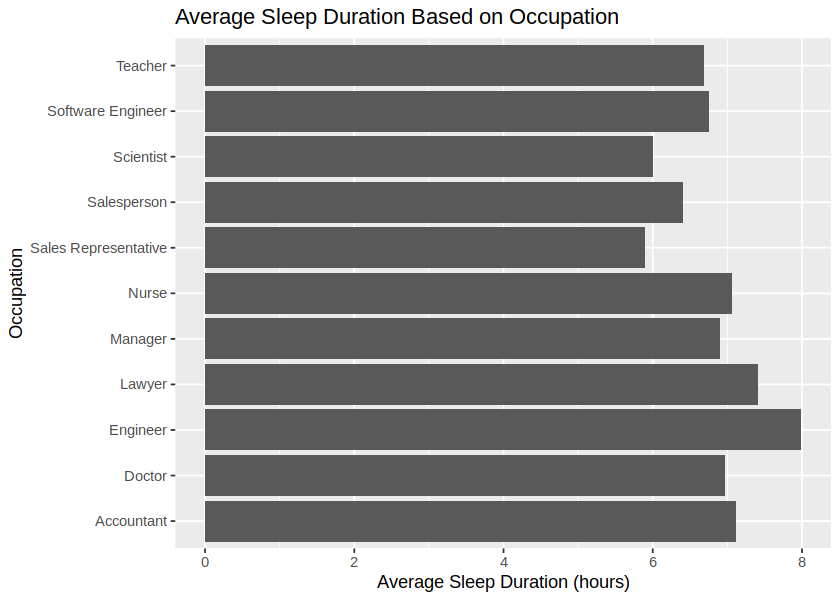

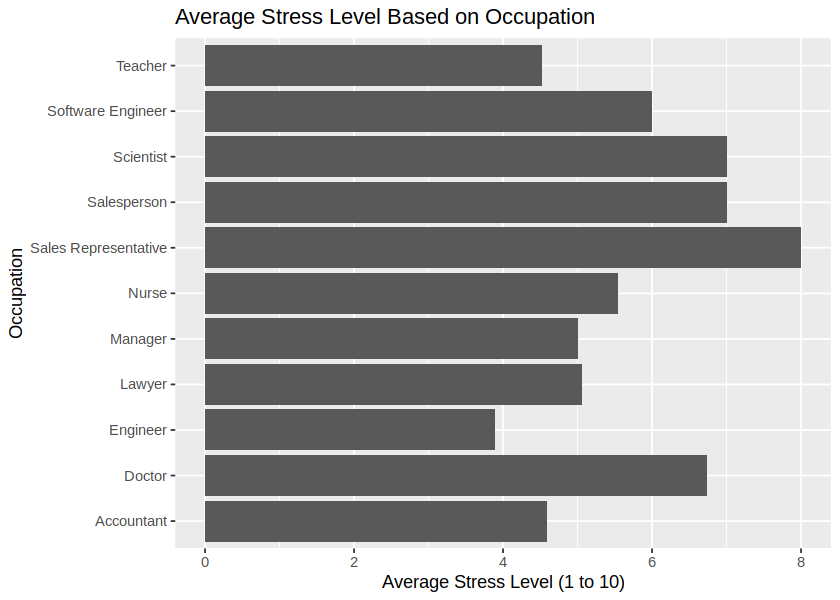

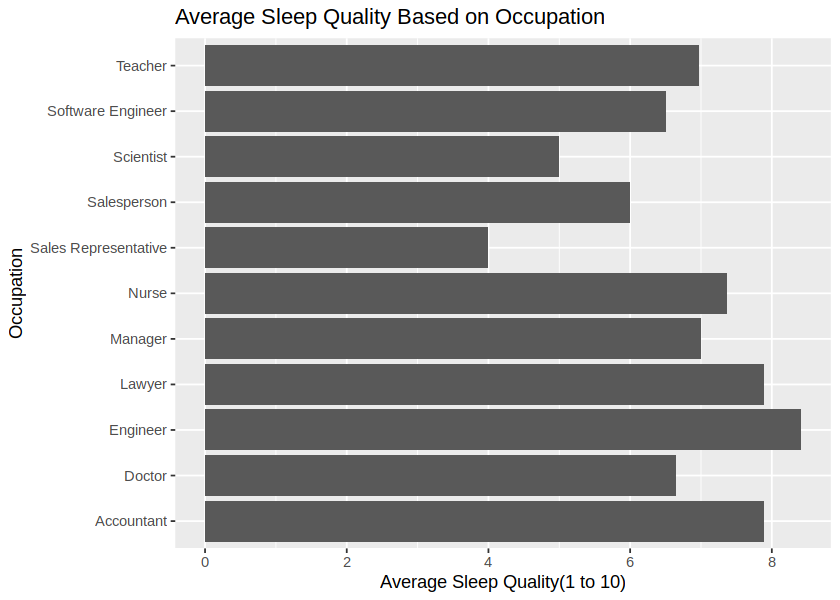

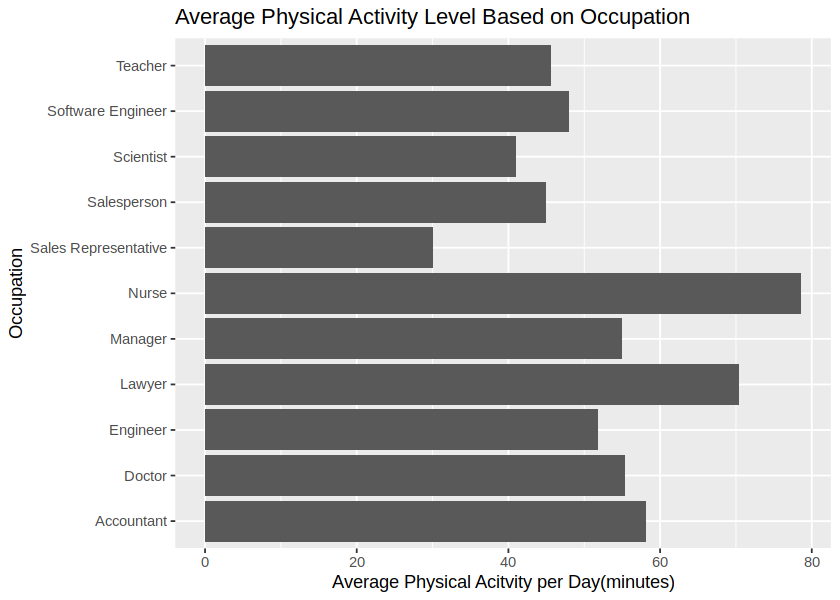

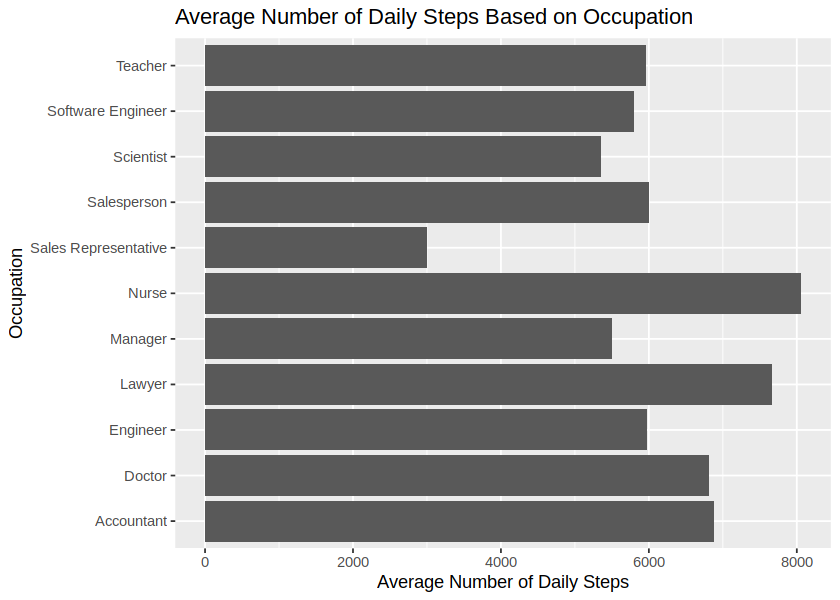

In [42]:
predictor_avg_by_occupation <- sleep_health_data |>
                       group_by(occupation) |> 
                       summarize(across(everything(), mean, na.rm = TRUE))
predictor_avg_by_occupation


sleep_duration_plot <- ggplot(predictor_avg_by_occupation, aes(x = sleep_duration, y = occupation))+
geom_bar(stat = "identity")+
labs(x = "Average Sleep Duration (hours)", y = "Occupation")+
 ggtitle("Average Sleep Duration Based on Occupation")
options(repr.plot.width = 7, repr.plot.height = 5)
sleep_duration_plot

options(repr.plot.width = 7, repr.plot.height = 5)

#---- 

stress_level_plot <- ggplot(predictor_avg_by_occupation, aes(x = stress_level, y = occupation))+
geom_bar(stat = "identity")+
labs(x = "Average Stress Level (1 to 10)", y = "Occupation")+
 ggtitle("Average Stress Level Based on Occupation")

stress_level_plot

options(repr.plot.width = 7, repr.plot.height = 5)

#---- 

sleep_quality_plot <- ggplot(predictor_avg_by_occupation, aes(x = quality_of_sleep, y = occupation))+
geom_bar(stat = "identity")+
labs(x = "Average Sleep Quality(1 to 10)", y = "Occupation")+
 ggtitle("Average Sleep Quality Based on Occupation")

sleep_quality_plot

options(repr.plot.width = 7, repr.plot.height = 5)

#----

physical_activity_plot <- ggplot(predictor_avg_by_occupation, aes(x = physical_activity_level, y = occupation))+
geom_bar(stat = "identity")+
labs(x = "Average Physical Acitvity per Day(minutes)", y = "Occupation")+
 ggtitle("Average Physical Activity Level Based on Occupation")

physical_activity_plot

options(repr.plot.width = 7, repr.plot.height = 5)

#---- 

daily_steps_plot <- ggplot(predictor_avg_by_occupation, aes(x = daily_steps, y = occupation))+
geom_bar(stat = "identity")+
labs(x = "Average Number of Daily Steps", y = "Occupation")+
 ggtitle("Average Number of Daily Steps Based on Occupation")

daily_steps_plot

options(repr.plot.width = 7, repr.plot.height = 5)


## Expected Outcomes and Significance

We seek to identify work-related associations between increased stress, sleep deprivation, and the resulting health effects using the Sleep Health and Lifestyle Dataset. Furthermore, we aim to explore the potential influence of gender on stress susceptibility in different professional domains. It is possible that this investigation will provide important new information about the particular aspects of certain jobs that lead to high stress. These kinds of discoveries could lead to focused treatments that eventually promote healthier workplaces and enhanced well-being in general.